## PRÀCTICA XNDL

Abril Risso i Anna Casanovas

In [3]:
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import datasets
import seaborn as sns
import pandas as pd
import numpy as np
import os

In [4]:
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score

In [5]:
#path_rain_data = "weatherAUS.csv"
path_rain_data = "rain_data.csv"
rain_data = pd.read_csv(path_rain_data, header=0, delimiter=',')

In [4]:
rain_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,48.0,22.0,1011.8,1008.7,NaN,NaN,20.4,28.8,No,Yes
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,89.0,91.0,1010.5,1004.2,8.0,8.0,15.9,17.0,Yes,Yes


## ANÀLISI EXPLORATÒRIA DE DADES

In [7]:
rain_data.dtypes

Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [6]:
data = rain_data

In [6]:
print(data.shape)
print(data.columns)

(67021, 23)
Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')


## ANÀLISI UNIVARIANT DE VARIABLE NUMÈRIQUES I CATEGÒRIQUES

### Variables Numèriques

In [7]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'object' and data[feature].dtypes != 'category' and data[feature].dtypes != 'bool']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


Number of numerical variables:  16
********************************************************************************
Numerical Variables Column:  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Variable: MinTemp
  Mitjana: 12.55
  Desviació Estàndard: 6.37


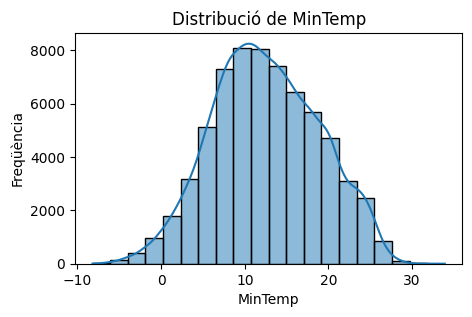

Variable: MaxTemp
  Mitjana: 22.48
  Desviació Estàndard: 7.11


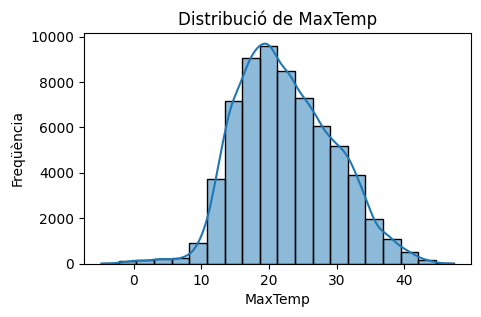

Variable: Rainfall
  Mitjana: 3.67
  Desviació Estàndard: 10.98


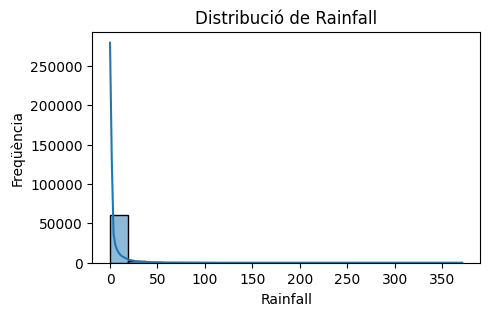

Variable: Evaporation
  Mitjana: 5.12
  Desviació Estàndard: 3.95


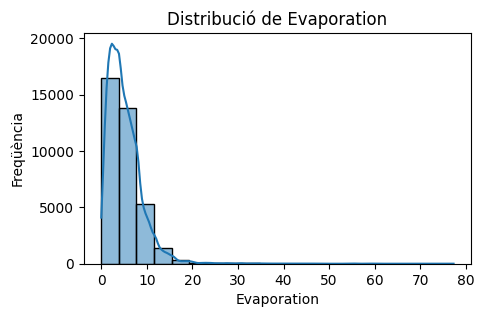

Variable: Sunshine
  Mitjana: 6.51
  Desviació Estàndard: 3.93


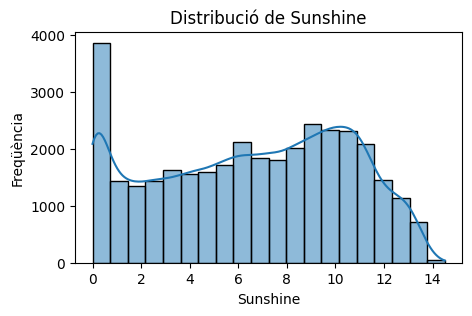

Variable: WindGustSpeed
  Mitjana: 42.14
  Desviació Estàndard: 14.64


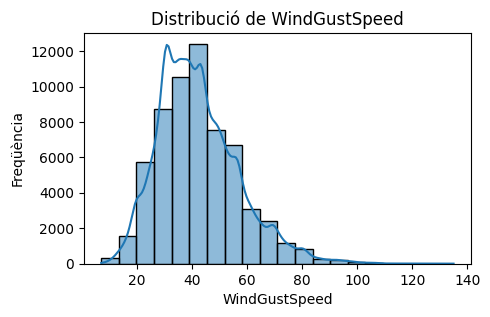

Variable: WindSpeed9am
  Mitjana: 14.63
  Desviació Estàndard: 9.23


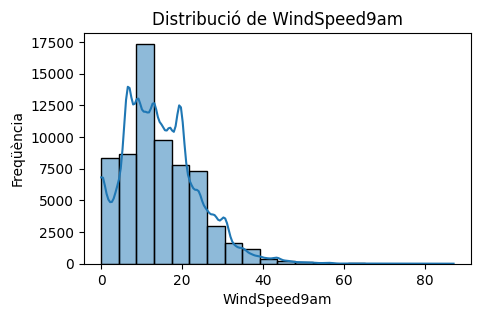

Variable: WindSpeed3pm
  Mitjana: 19.19
  Desviació Estàndard: 9.17


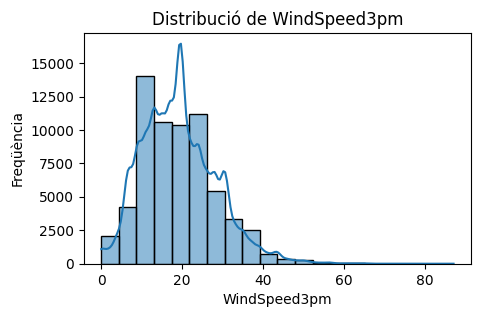

Variable: Humidity9am
  Mitjana: 72.07
  Desviació Estàndard: 18.48


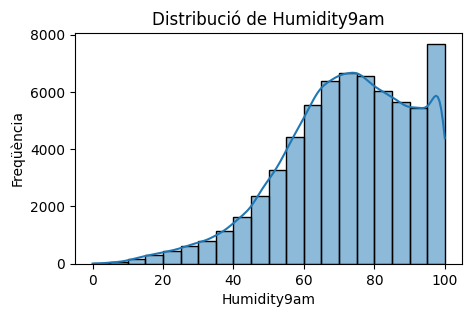

Variable: Humidity3pm
  Mitjana: 57.52
  Desviació Estàndard: 21.74


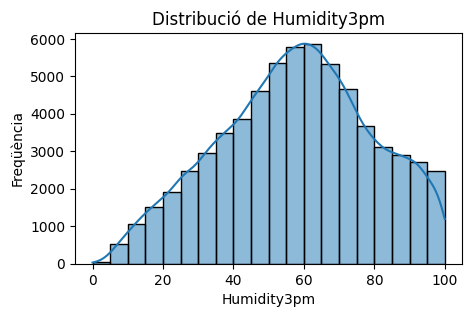

Variable: Pressure9am
  Mitjana: 1016.52
  Desviació Estàndard: 7.34


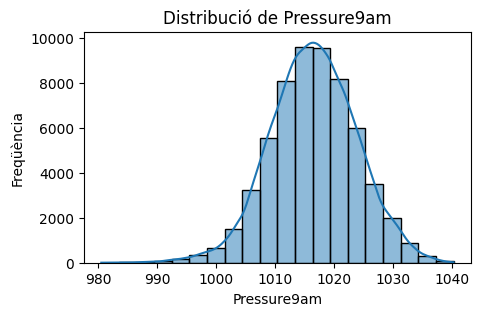

Variable: Pressure3pm
  Mitjana: 1014.24
  Desviació Estàndard: 7.28


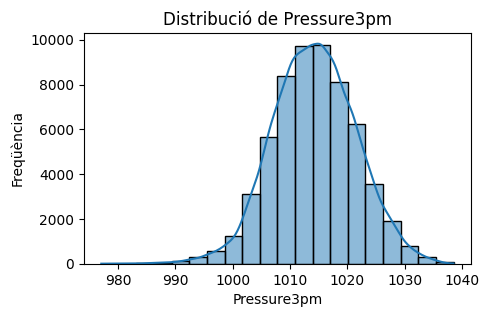

Variable: Cloud9am
  Mitjana: 5.05
  Desviació Estàndard: 2.78


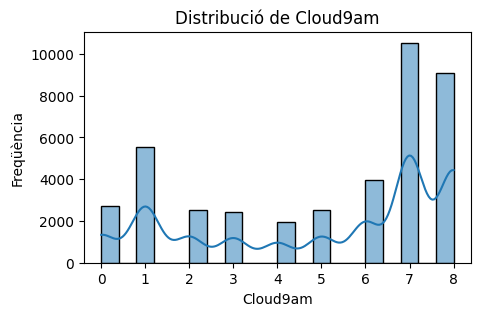

Variable: Cloud3pm
  Mitjana: 5.18
  Desviació Estàndard: 2.62


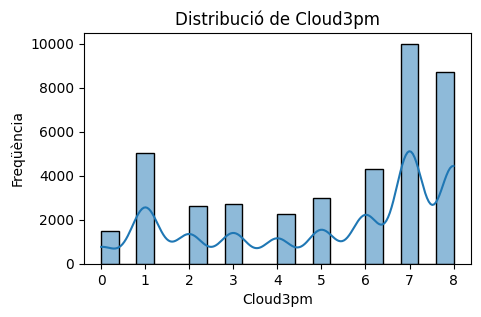

Variable: Temp9am
  Mitjana: 16.89
  Desviació Estàndard: 6.43


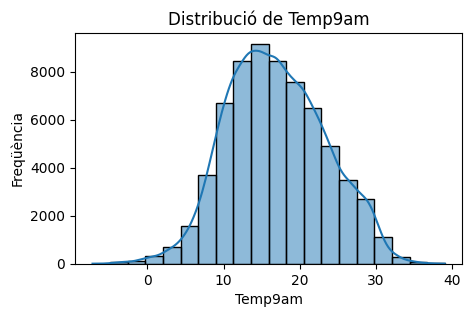

Variable: Temp3pm
  Mitjana: 20.82
  Desviació Estàndard: 6.93


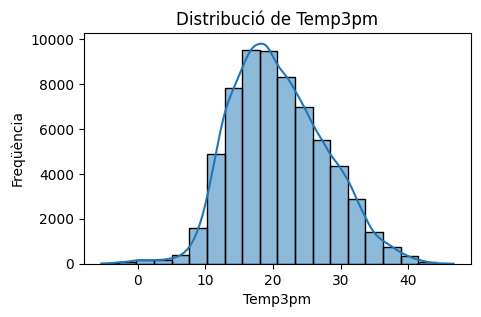

In [10]:
for column in var_num:
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column])

    # Imprimir valores
    print(f"Variable: {column}")
    print(f"  Mitjana: {mitjana:.2f}")
    print(f"  Desviació Estàndard: {desviacio_estandard:.2f}")

    plt.figure(figsize=(5, 3))
    sns.histplot(data[column], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

### Variables Categòriques

In [8]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

Number of categorical variables:  7
********************************************************************************
Categorical variables column name: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
for column in var_cat:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", legend=False)
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

In [8]:
# Observem els valors únics de cada variables i d'aquí veiem quines són les categòriques i quines les numèriques. 

unique_counts = pd.DataFrame.from_records([(col, data[col].nunique()) for col in data.columns],
                                         columns=['col_name', 'unique']).sort_values(by=['unique'])
unique_counts

,col_name,unique
22,RainTomorrow,2
21,RainToday,2
18,Cloud3pm,9
17,Cloud9am,9
10,WindDir3pm,16
9,WindDir9am,16
7,WindGustDir,16
12,WindSpeed3pm,42
11,WindSpeed9am,42
1,Location,49


In [13]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,65864.000000,65940.000000,64271.000000,37591.000000,34831.000000,61576.000000,65971.000000,65328.000000,65257.000000,64388.000000,59750.000000,59761.000000,41303.000000,40071.000000,65689.000000,64811.000000
mean,12.552091,22.480866,3.669512,5.122383,6.514499,42.142150,14.634764,19.187194,72.074781,57.521433,1016.524147,1014.237604,5.053870,5.184148,16.888700,20.822340
std,6.371143,7.108686,10.981571,3.950017,3.932475,14.638665,9.227585,9.171806,18.481003,21.741282,7.343975,7.283068,2.778949,2.620094,6.427827,6.931696
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,8.000000,17.200000,0.000000,2.400000,3.200000,31.000000,7.000000,13.000000,61.000000,42.000000,1011.700000,1009.300000,2.000000,3.000000,12.200000,15.800000
50%,12.300000,21.800000,0.000000,4.400000,6.800000,41.000000,13.000000,19.000000,74.000000,58.000000,1016.500000,1014.200000,6.000000,6.000000,16.500000,20.100000
75%,17.200000,27.400000,2.200000,7.000000,9.900000,50.000000,20.000000,24.000000,87.000000,73.000000,1021.500000,1019.200000,7.000000,7.000000,21.400000,25.500000
max,33.900000,47.300000,371.000000,77.300000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1040.300000,1038.500000,8.000000,8.000000,39.000000,46.700000


## ANÀLISI BIVARIANT AMB LA VARIABLE OBJECTIU

#### BIVARIATE: Categòriques amb la variable objectiu

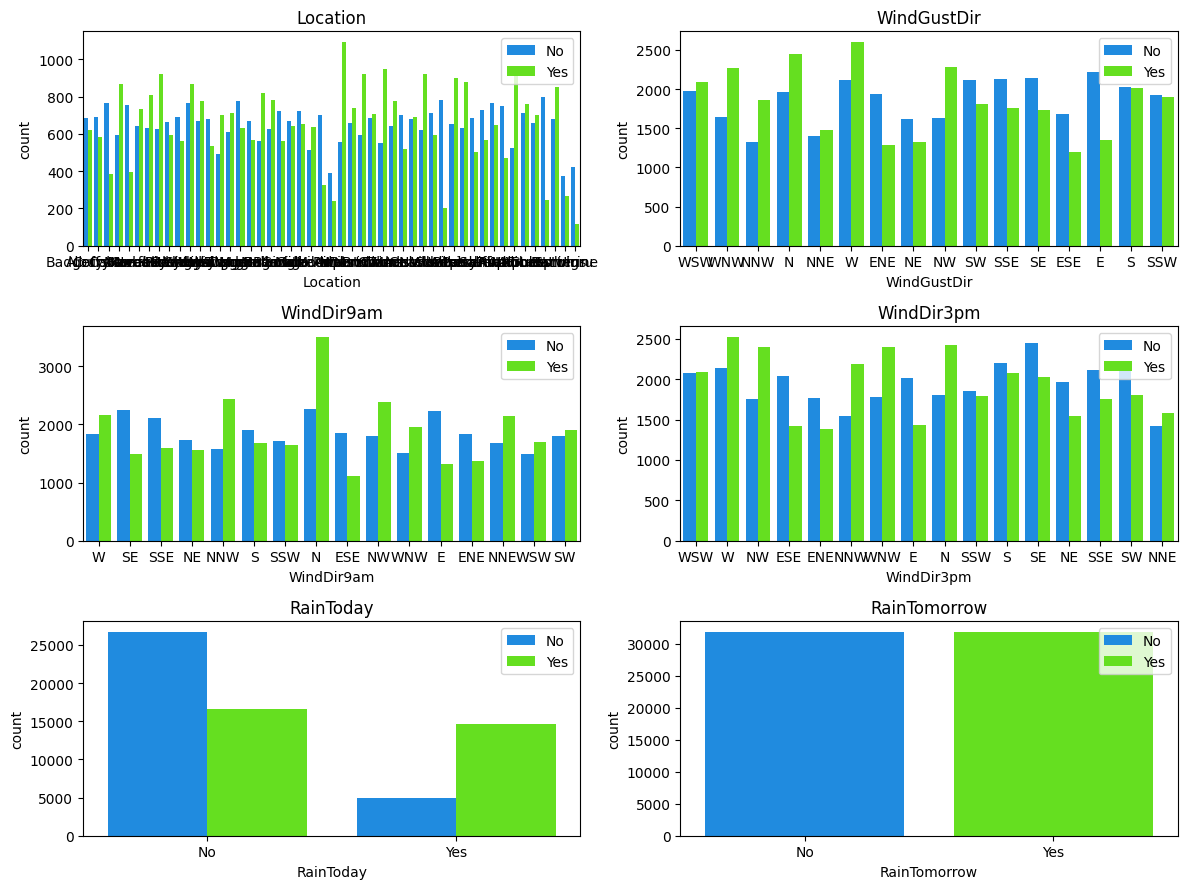

In [14]:
n_cols = 2 
n_rows = (len(var_cat[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows), dpi=100)  
axes = axes.flatten()  

for idx, variable in enumerate(var_cat[1:]):
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].legend(loc='upper right')
    axes[idx].set_title(variable)

for ax in axes[len(var_cat[1:]):]:
    ax.set_visible(False) 

plt.tight_layout()
plt.show()

#### BIVARIATE: numèriques amb la variable objectiu

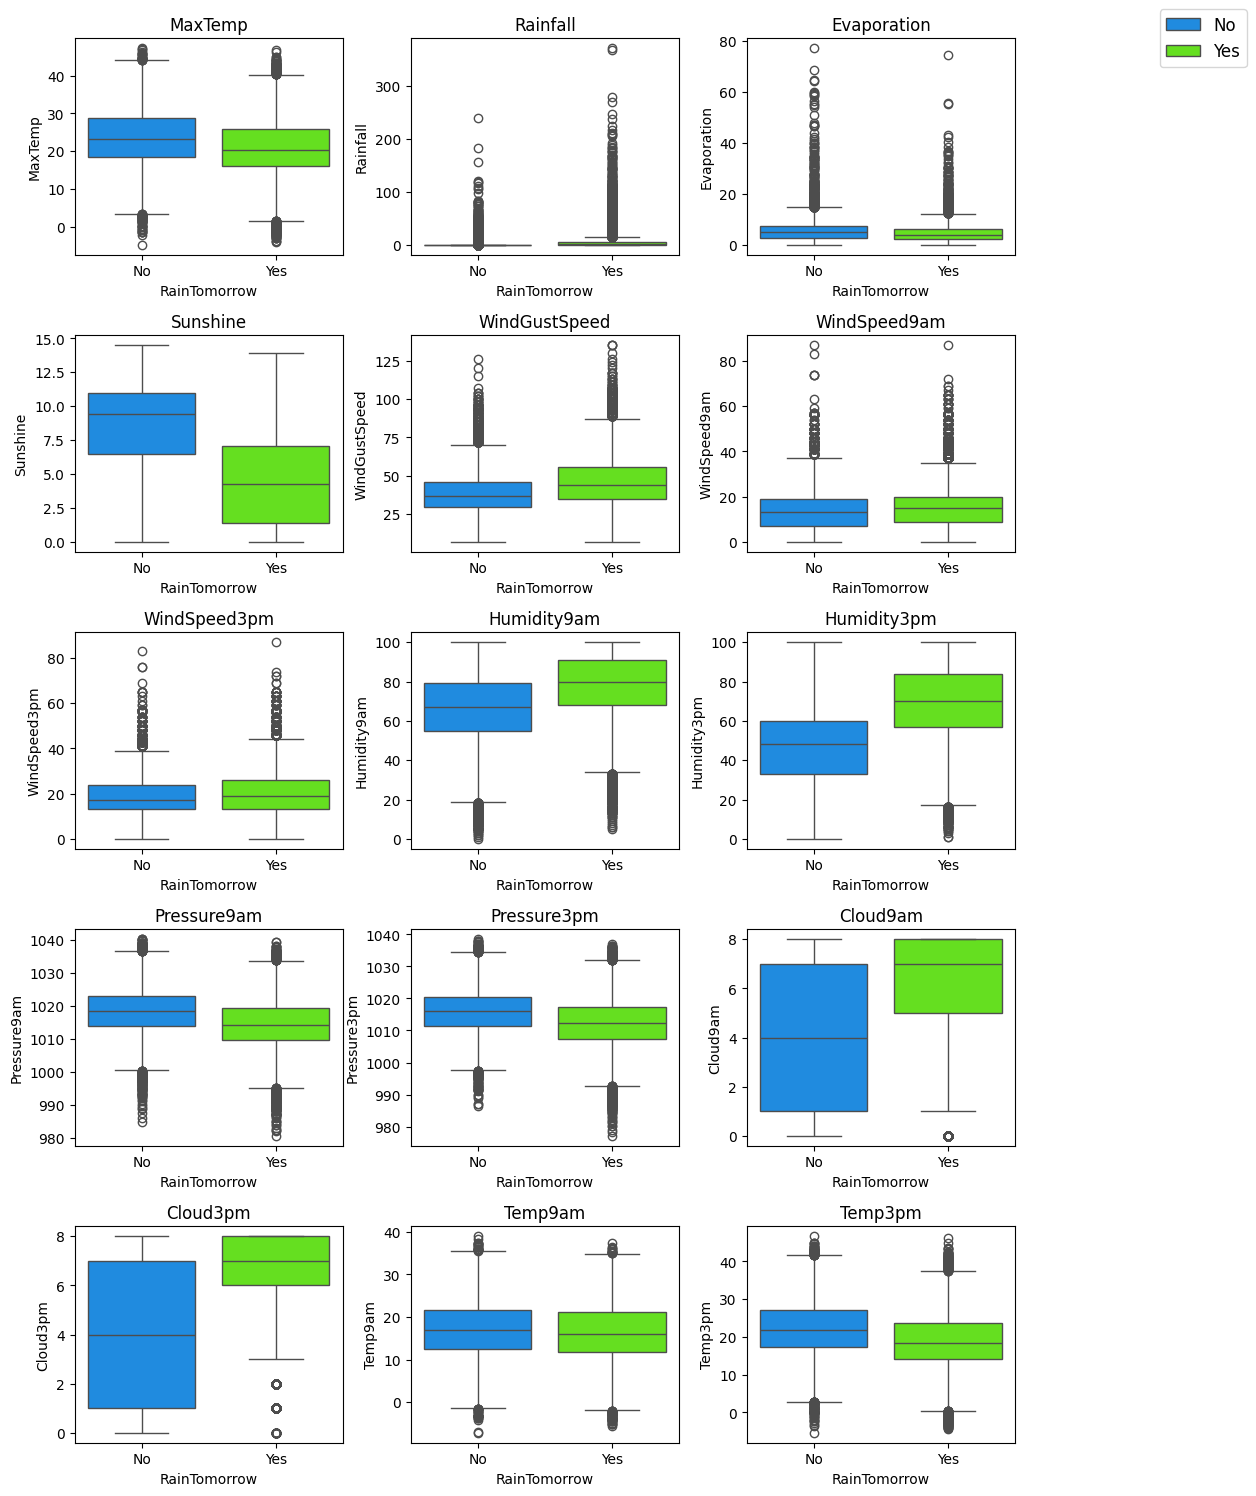

In [15]:
n_cols = 3
n_rows = (len(var_num[1:]) + n_cols - 1) // n_cols 

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, n_rows * 3), dpi=100)
axes = axes.flatten() 

for idx, variable in enumerate(var_num[1:]):
    sns.boxplot(data=data, x='RainTomorrow', hue='RainTomorrow', y=variable, palette='gist_rainbow_r', ax=axes[idx])
    axes[idx].set_title(f'{variable}')
    axes[idx].set_xlabel('RainTomorrow')
    axes[idx].set_ylabel(variable)
    axes[idx].legend().remove()

for ax in axes[len(var_num[1:]):]:
    ax.set_visible(False)  

handles, labels = axes[0].get_legend_handles_labels()  
fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.05, 1), fontsize='large')

plt.tight_layout()
plt.subplots_adjust(right=0.85) 
plt.show()

MATRIU DE CORRELACIÓ

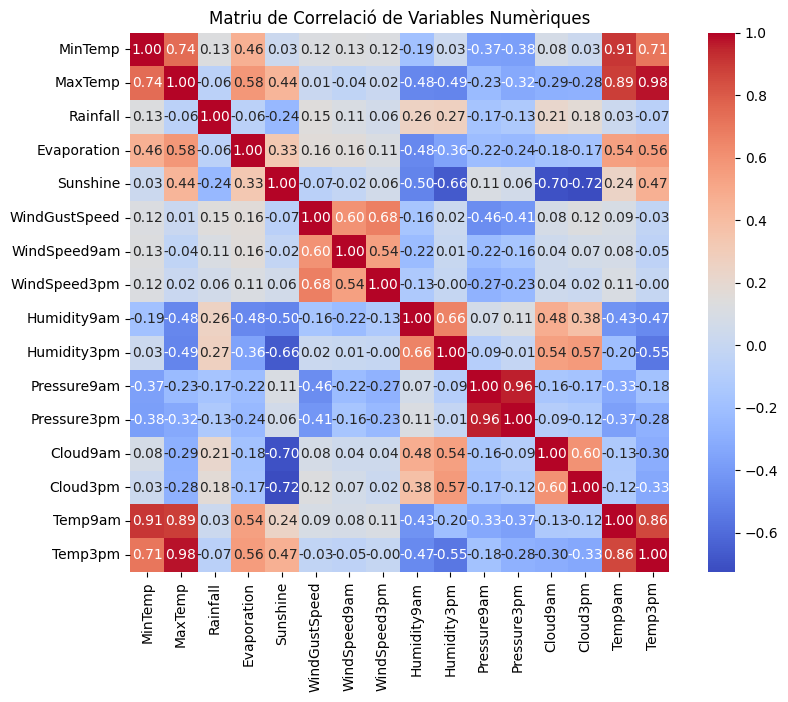

In [16]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

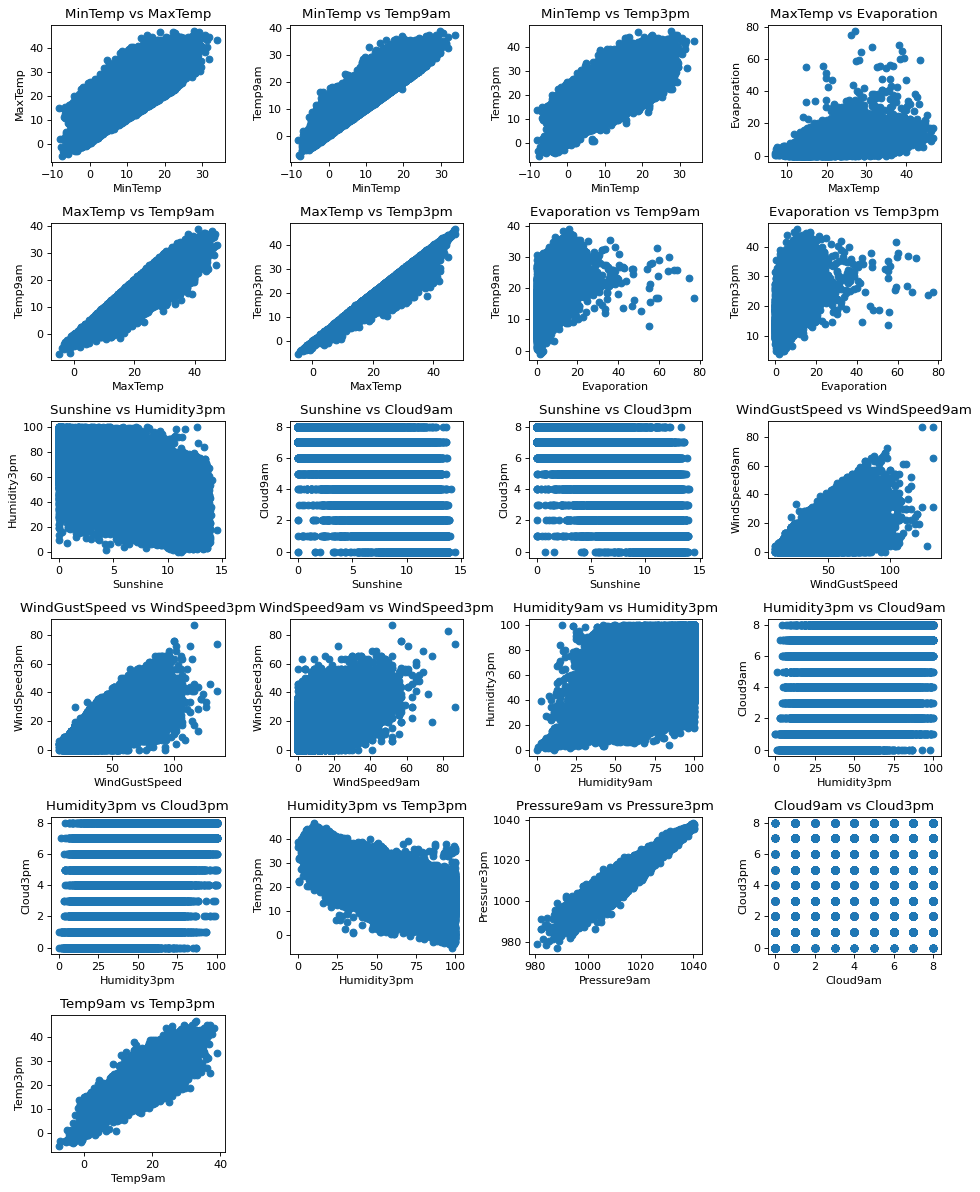

In [17]:
corr_matrix = data[var_num].corr().abs()

# Selecciona las parejas de variables con una correlación mayor a 0.5
umbral_correlacion = 0.5
parejas_alta_corr = np.where((np.triu(corr_matrix.values, k=1) < -umbral_correlacion) | (np.triu(corr_matrix.values, k=1) > umbral_correlacion))

indices_fila = parejas_alta_corr[0]
indices_columna = parejas_alta_corr[1]

num_graficos = len(indices_fila)
n_cols = 4  
n_rows = (num_graficos + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(3 * n_cols, 2.5 * n_rows), dpi=80) 
axes = axes.flatten() 

for idx, (fila, columna) in enumerate(zip(indices_fila, indices_columna)):
    variable_x = corr_matrix.columns[fila]
    variable_y = corr_matrix.index[columna]

    axes[idx].scatter(data[variable_x], data[variable_y])
    axes[idx].set_title(f'{variable_x} vs {variable_y}')
    axes[idx].set_xlabel(variable_x)
    axes[idx].set_ylabel(variable_y)

for ax in axes[num_graficos:]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

### RECODIFICACIÓ DE VARIABLES CATEGÒRIQUES

In [9]:
sum(data['Date'].isna())

0

In [10]:
data['Date']= pd.to_datetime(data["Date"])
#Creating a collumn of year
data['year'] = data.Date.dt.year
data['month'] = data.Date.dt.month
data['day'] = data.Date.dt.day

data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,year,month,day
0,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
1,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,1005.4,NaN,NaN,20.6,28.9,No,No,2008,12,6
2,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,1003.6,NaN,NaN,18.3,30.2,No,Yes,2008,12,9
3,2008-12-11,Albury,13.4,30.4,0.0,NaN,NaN,N,30.0,SSE,...,1008.7,NaN,NaN,20.4,28.8,No,Yes,2008,12,11
4,2008-12-12,Albury,15.9,21.7,2.2,NaN,NaN,NNE,31.0,NE,...,1004.2,8.0,8.0,15.9,17.0,Yes,Yes,2008,12,12


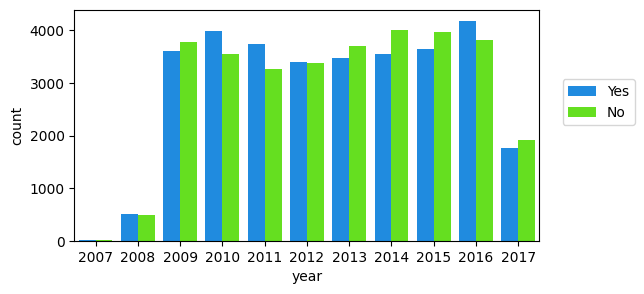

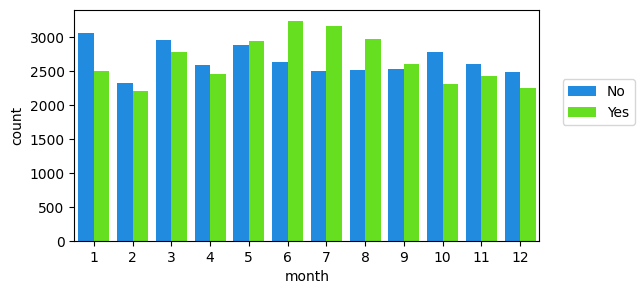

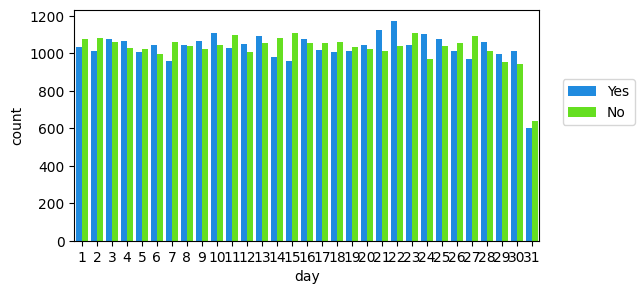

In [10]:
variables_temporals = ['year', 'month', 'day']
for variable in variables_temporals:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='RainTomorrow', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

Veiem que no hi ha canvis significatius en la variable objectiu per les temporals així que les eliminem

In [25]:
data = data.drop(columns=['Date'])
data = data.drop(columns=['day'])
data = data.drop(columns=['month'])
data = data.drop(columns=['year'])

IDENTIFICACIÓ I TRACTAMENT D'OUTLIERS

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

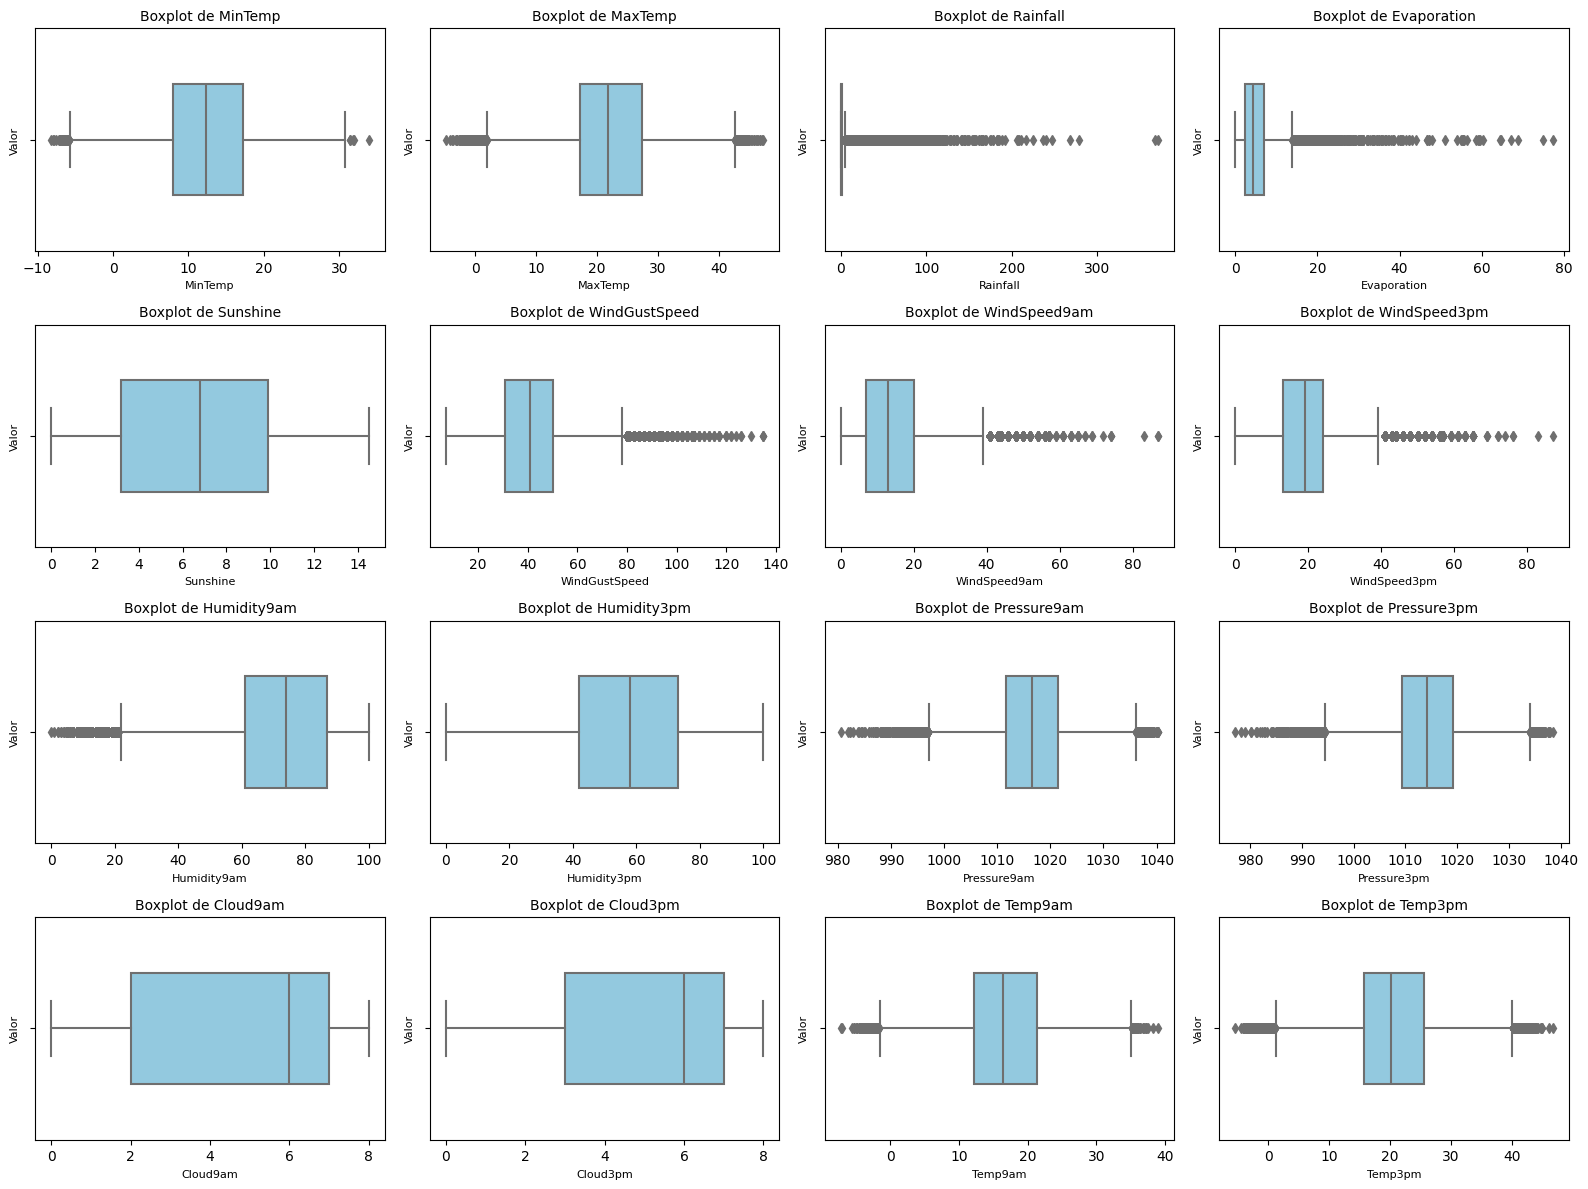

In [14]:
n_cols = 4 
n_rows = (len(var_num) + n_cols - 1) // n_cols  

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 3 * n_rows))  
axes = axes.flatten()  

for idx, columna in enumerate(var_num):
    sns.boxplot(x=data[columna], color='skyblue', width=0.5, ax=axes[idx])
    axes[idx].set_title(f'Boxplot de {columna}', fontsize=10)
    axes[idx].set_xlabel(columna, fontsize=8)
    axes[idx].set_ylabel('Valor', fontsize=8)

for ax in axes[len(var_num):]:
    ax.set_visible(False)  

plt.tight_layout()
plt.show()

Veiem que tot i que hi ha valors extrems que poden considerar-se outliers, en tots els casos són mesures correctes que hem considerat necessàries pel model. Per tant, no eliminem cap outlier. 

IDENTIFICACIÓ I TRACTAMENT DE MISSING VALUES

In [15]:
# VISUALITZACIÓ DE MISSING VALUES

def data_explore(dataframe): # Per mirar més o menys quines variables tenen més missing values
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",dataframe.shape)
    print('*'*70)
    print(dataframe.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(dataframe.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(dataframe.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(dataframe.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (dataframe.isnull().sum() / len(dataframe)).sort_values(ascending=False),2))
    print('*'*70)

In [16]:
data_explore(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (67021, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67021 entries, 0 to 67020
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       67021 non-null  object 
 1   MinTemp        65864 non-null  float64
 2   MaxTemp        65940 non-null  float64
 3   Rainfall       64271 non-null  float64
 4   Evaporation    37591 non-null  float64
 5   Sunshine       34831 non-null  float64
 6   WindGustDir    61534 non-null  object 
 7   WindGustSpeed  61576 non-null  float64
 8   WindDir9am     62270 non-null  object 
 9   WindDir3pm     64733 non-null  object 
 10  WindSpeed9am   65971 non-null  float64
 11  WindSpeed3pm   65328 non-null  float64
 12  Humidity9am    65257 non-null  float64
 13  Humidity3pm    64388 non-null  floa

Borrem les files que tenen missing data a RainTomorrow perquè llavors no podrem predir-la si no sabem el seu valor real. 

In [12]:
data = data.dropna(subset=['RainTomorrow'])

Borrem les files que tenen missing data d'aquelles variables que tinguin un alt percentatge de missing data

In [13]:
#eliminar files que tenen missings de les variables sunshine i evaporation
data = data.dropna(subset=['Sunshine', 'Evaporation'])

In [19]:
data_explore(data)
data.shape

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (31756, 25)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
Index: 31756 entries, 2683 to 65764
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       31756 non-null  object 
 1   MinTemp        31718 non-null  float64
 2   MaxTemp        31739 non-null  float64
 3   Rainfall       31611 non-null  float64
 4   Evaporation    31756 non-null  float64
 5   Sunshine       31756 non-null  float64
 6   WindGustDir    29616 non-null  object 
 7   WindGustSpeed  29630 non-null  float64
 8   WindDir9am     30709 non-null  object 
 9   WindDir3pm     31426 non-null  object 
 10  WindSpeed9am   31672 non-null  float64
 11  WindSpeed3pm   31565 non-null  float64
 12  Humidity9am    31564 non-null  float64
 13  Humidity3pm    31471 non-null  float6

(31756, 25)

Es probaran diferents tècniques d'imputació per veure quina és més eficaç

In [14]:
#IMPUTACIÓ PER KNN
from sklearn.impute import KNNImputer

# Fa falta haver codificat les variables categòriques
def imputacio_knn(train_data, test_data):
    train_data_copy = train_data.copy()
    test_data_copy = test_data.copy()

    imputer_num = KNNImputer(n_neighbors=5)

    return imputer_num.fit_transform(train_data_copy), imputer_num.transform(test_data_copy)

In [15]:
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

def imputar_con_mice(X_train, X_test):
    # Crear una instancia del imputador MICE
    imputer = IterativeImputer(max_iter=10, random_state=0)

    # Aprender los parámetros de imputación y aplicar la imputación en el conjunto de entrenamiento
    X_train_imputed = imputer.fit_transform(X_train)

    # Aplicar la misma transformación en el conjunto de prueba
    X_test_imputed = imputer.transform(X_test)

    return X_train_imputed, X_test_imputed


In [16]:
def imputacio_moda(data1):
    data = data1.copy()

    for column in data.columns:
        moda = data[column].mode()[0]
        data[column] = data[column].fillna(moda)

    return data

BALANCEIG DE LES DADES

A l'anàlisi univariant i bivariant ja hem vist que la nostra variable a predir està molt balancejada

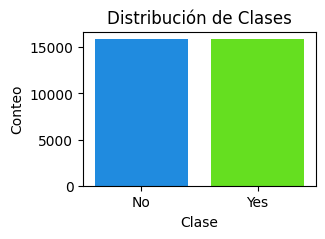

In [18]:
data['RainTomorrow'].value_counts()

plt.figure(figsize=(3, 2))
sns.countplot(x='RainTomorrow', hue='RainTomorrow', data=data, palette="gist_rainbow_r")
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()


Per tant, no cal utilitzar cap tècnica de oversampling o undersampling

#### ANÀLISI DE REDUNDÀNCIA

In [19]:
from scipy.stats import chi2_contingency

categoriques =  data.select_dtypes(include=['category', 'object']).columns.tolist()
for var in categoriques:

    contingency_table = pd.crosstab(data[var], data['RainTomorrow'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)

    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}")

Chi-square test for Location: chi2 = 1268.4324149527904, p-value = 1.611334817004275e-249
Chi-square test for WindGustDir: chi2 = 554.1824208443354, p-value = 1.88800087527464e-108
Chi-square test for WindDir9am: chi2 = 797.7210035698924, p-value = 2.61460702670423e-160
Chi-square test for WindDir3pm: chi2 = 574.8029827452399, p-value = 7.962757000550973e-113
Chi-square test for RainToday: chi2 = 3474.423806902563, p-value = 0.0
Chi-square test for RainTomorrow: chi2 = 31752.000120233162, p-value = 0.0


## MODEL LINEAL

Com a model lineal es fa una regressió logística ja que la nostra variable objectiu és binària.

In [17]:
def particio_dades(data):
    X = data.copy()
    X = X.drop('RainTomorrow', axis=1)
    y = data['RainTomorrow']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    return  X_train, X_test, y_train, y_test

In [18]:
def recodificacio_one_hot(X_train, X_test, categoriques, numeriques):

    #Aquí igual eliminar variable del localització?? HOLI JO PROVARIA CODIFICACIÓ LABEL PER LOCALITZACIÓ :)
    #O també es bona opció agrupar les ciutats en els estats corresponents q així no hi haurà tantes categories
    encoder = OneHotEncoder(sparse_output=False)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])
    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)
    return X_train_combined, X_test_combined

In [19]:
from sklearn.preprocessing import MinMaxScaler

def normalitzacio_dades(X_train, X_test, metode=None):
    if metode == 'standard':
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled
    
    elif metode == 'minmax':
        scaler = MinMaxScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        return X_train_scaled, X_test_scaled

In [20]:
# Visualitzar matriu de confusió
def visualitzar_matriu_confusio(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title('Matriu de Confusió')
    plt.xlabel('Prediccions')
    plt.ylabel('Valores Reals')
    plt.show()

In [21]:
# Visualitzar corba ROC
def visualitzar_corba_roc(y_test, y_pred):
    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

def entrenament(data, model, parametres=None, scale=False):
    X_train, X_test, y_train, y_test = particio_dades(data)

    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    y_test_encoded = encoder.transform(y_test)

    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
    
    # Recodificació One-Hot
    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)

    # Normalització dades
    if scale:
        if scale == 'standard':
            X_train_encoded, X_test_encoded = normalitzacio_dades(X_train_encoded, X_test_encoded, 'standard')
        elif scale == 'minmax':
            X_train_encoded, X_test_encoded = normalitzacio_dades(X_train_encoded, X_test_encoded, 'minmax')

    # Imputació missings
    X_train_imputed, X_test_imputed = imputacio_knn(X_train_encoded, X_test_encoded)

    # Cross Validation
    if parametres:
        grid_search = GridSearchCV(model, parametres, cv=5, scoring='f1')
        grid_search.fit(X_train_imputed, y_train_encoded)
        print("Millors paràmetres:", grid_search.best_params_)
        print("Millor F1 score en CV:", grid_search.best_score_)
        model = grid_search.best_estimator_

    model.fit(X_train_imputed, y_train_encoded)
    y_pred = model.predict(X_test_imputed)

    #Mètriques
    precision = precision_score(y_test_encoded, y_pred, average='binary')
    recall = recall_score(y_test_encoded, y_pred, average='binary')
    f1 = f1_score(y_test_encoded, y_pred, average='binary')
    accuracy = accuracy_score(y_test_encoded, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-Score:", f1)
    print("Accuracy:", accuracy)

    # Visualització corba ROC i matriu de confusió
    visualitzar_matriu_confusio(y_test_encoded, y_pred)
    visualitzar_corba_roc(y_test_encoded, y_pred)

### Logistic Regression

Millors paràmetres: {'C': 1, 'penalty': 'l2'}
Millor F1 score en CV: 0.7983907131710343
Precision: 0.8087234042553192
Recall: 0.7922050854522718
F1-Score: 0.8003790271636134
Accuracy: 0.8009866694657289


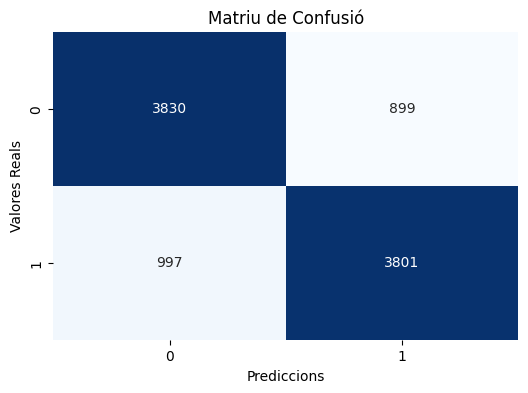

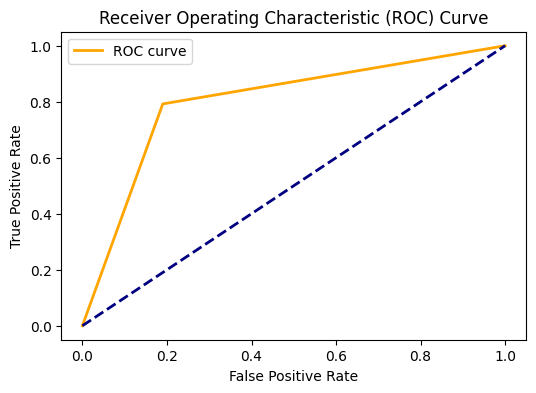

In [28]:
model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.01, 0.1, 1],  # Valors per la regularització
    'penalty': ['l1', 'l2']  # Tipus de penalització
}

# els valors d'scale han de ser: None, 'standard' o 'minmax'
entrenament(data, model, param_grid, scale='minmax')

Precision: 0.8108338664960546
Recall: 0.7924135056273447
F1-Score: 0.8015178665542321
Accuracy: 0.8023512123438648


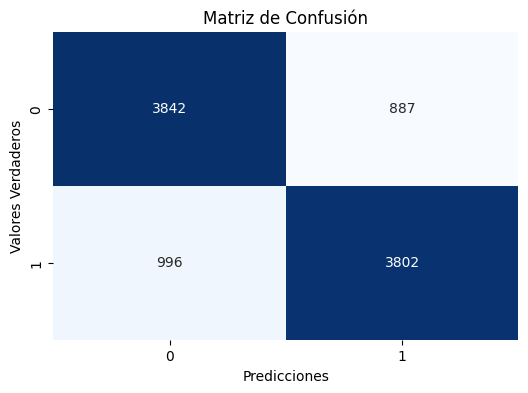

In [26]:
model = LogisticRegression()
entrenament(data, model)

### Random Forest

Millors paràmetres: {'max_depth': 30, 'n_estimators': 200}
Millor F1 score en CV: 0.8078184154106243
Precision: 0.8047520661157025
Recall: 0.8117965819091288
F1-Score: 0.8082589748910562
Accuracy: 0.8060249816311535


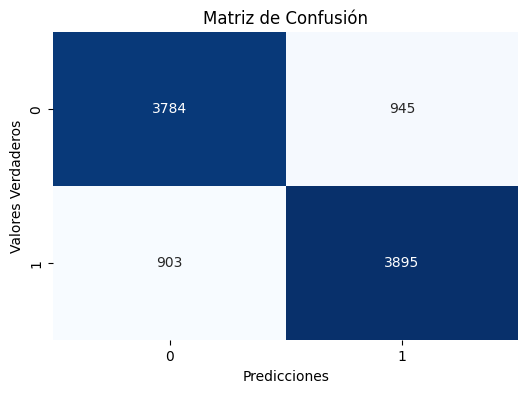

In [61]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40, 50]
}
entrenament(data, model, param_grid, scale='standard')

### Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC
model = SVC()
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}
entrenament(data, model, param_grid)

### EMB

In [ ]:
#entrenar modelo ebm
from interpret.glassbox import ExplainableBoostingClassifier
model = ExplainableBoostingClassifier()
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_leaves': [3, 5, 10],
    'max_bins': [256, 512],
    'min_samples_leaf': [5, 10, 20],
    'n_estimators': [50, 100, 200]
}
entrenament(data, model, param_grid)

# PERCEPTRÓ MULTICAPA

In [ ]:
%pip install tensorflow

In [29]:
import itertools
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist, fashion_mnist

from keras.optimizers.legacy import SGD, Adam
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris, fetch_covtype, fetch_california_housing
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score

In [30]:
def plot_curves(history):

  train_loss = history.history['loss']
  val_loss = history.history['val_loss']
  train_accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']
  epochs = range(1, len(train_loss) + 1)

  fig, axes = plt.subplots(1, 2, figsize=(14, 5))

  axes[0].plot(epochs, train_loss, 'g-', label='Training Loss')
  axes[0].plot(epochs, val_loss, 'orange', label='Validation Loss')
  axes[0].set_title('Training and Validation Loss')
  axes[0].set_xlabel('Epochs')
  axes[0].set_ylabel('Loss')
  axes[0].legend()
  axes[0].grid(True)

  axes[1].plot(epochs, train_accuracy, 'g-', label='Training Accuracy')
  axes[1].plot(epochs, val_accuracy, 'orange', label='Validation Accuracy')
  axes[1].set_title('Training and Validation Accuracy')
  axes[1].set_xlabel('Epochs')
  axes[1].set_ylabel('Accuracy')
  axes[1].legend()
  axes[1].grid(True)

  plt.tight_layout()

  plt.show()

In [33]:
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

def entrenament_perceptro(data):
    X_train, X_test, y_train, y_test = particio_dades(data)

    # Codificar y_train y y_test justo después de la partición
    encoder = LabelEncoder()
    y_train_encoded = encoder.fit_transform(y_train)
    y_test_encoded = encoder.transform(y_test)

    numeriques = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X_train.select_dtypes(include=['category', 'object']).columns.tolist()
    
    X_train_encoded, X_test_encoded = recodificacio_one_hot(X_train, X_test, categoriques, numeriques)
    
    X_train_norm, X_test_norm = normalitzacio_dades(X_train_encoded, X_test_encoded, 'minmax')

    X_train_imputed, X_test_imputed = imputacio_knn(X_train_norm, X_test_norm)

    # Define the model
    model = Sequential([
        Dense(2, activation='softmax')
    ])
    learning_rate = 0.001
    optimizer = Adam(learning_rate=learning_rate)

    # Compile the model
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    # Train the model
    num_epochs = 100
    batch_size = 16
    history = model.fit(X_train_imputed, y_train_encoded, epochs=num_epochs, batch_size=batch_size, validation_split=0.1, verbose=2)

    # Evaluate the model
    loss, accuracy = model.evaluate(X_test_imputed, y_test_encoded)
    print("Test Loss:", loss)
    print("Test Accuracy:", accuracy)

    # Plot leaning curves
    plot_curves(history)

    # FALTA POSAR LES MÈTRIQUES

MODEL 1

Epoch 1/100
1251/1251 - 3s - loss: 0.5752 - accuracy: 0.6971 - val_loss: 0.5026 - val_accuracy: 0.7598 - 3s/epoch - 2ms/step
Epoch 2/100
1251/1251 - 2s - loss: 0.4826 - accuracy: 0.7715 - val_loss: 0.4725 - val_accuracy: 0.7728 - 2s/epoch - 1ms/step
Epoch 3/100
1251/1251 - 2s - loss: 0.4610 - accuracy: 0.7826 - val_loss: 0.4647 - val_accuracy: 0.7769 - 2s/epoch - 1ms/step
Epoch 4/100
1251/1251 - 2s - loss: 0.4516 - accuracy: 0.7874 - val_loss: 0.4550 - val_accuracy: 0.7796 - 2s/epoch - 1ms/step
Epoch 5/100
1251/1251 - 2s - loss: 0.4454 - accuracy: 0.7894 - val_loss: 0.4501 - val_accuracy: 0.7832 - 2s/epoch - 1ms/step
Epoch 6/100
1251/1251 - 2s - loss: 0.4415 - accuracy: 0.7917 - val_loss: 0.4474 - val_accuracy: 0.7836 - 2s/epoch - 1ms/step
Epoch 7/100
1251/1251 - 1s - loss: 0.4387 - accuracy: 0.7936 - val_loss: 0.4421 - val_accuracy: 0.7872 - 1s/epoch - 1ms/step
Epoch 8/100
1251/1251 - 2s - loss: 0.4367 - accuracy: 0.7949 - val_loss: 0.4403 - val_accuracy: 0.7886 - 2s/epoch - 2ms/step


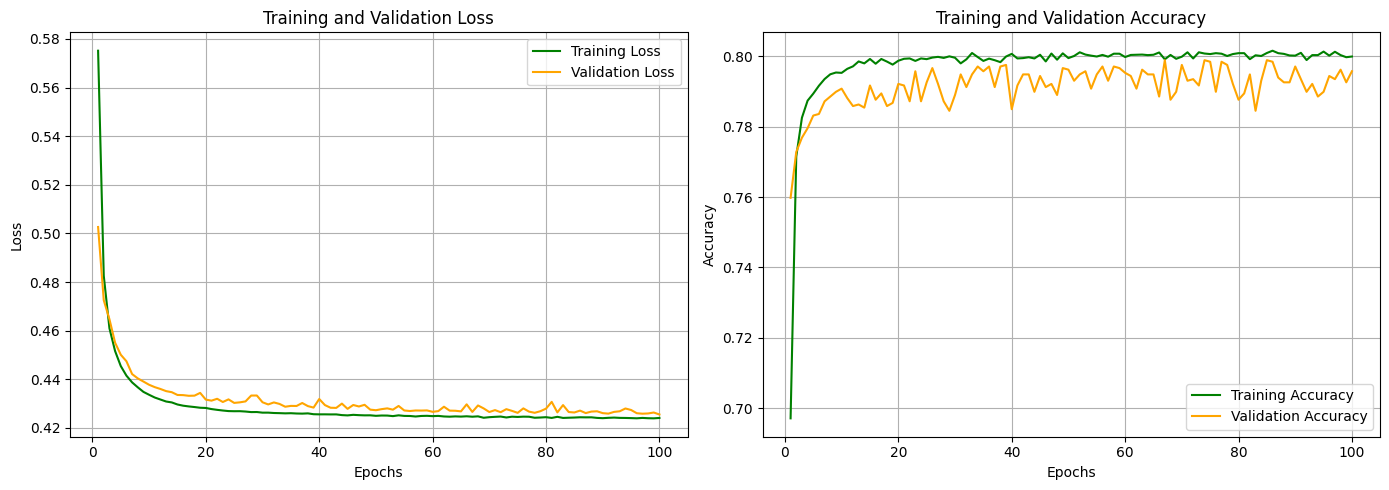

In [34]:
datos = data.copy()
entrenament_perceptro(datos)

- Diagnosticar situació actual del model(corbes de perdua, mètriques de rendiment, matriu de confusió i model summary)
- Fa underfit, fit o overfit? Entre els possibles diagnòstics estan l’underfit, fit, overfit, inestabilitat del procés d’aprenentatge, manca de convergència, convergència excessivament ràpida/lenta,
comportament aleatori, etc.


• Proposar una millora potencial en funci ́o del diagn`ostic anterior, com per exemple
canvis a l’arquitectura del model o ajustament d’hiperpar`ametres.
• Experimentar amb la millora seleccionada i avaluar-ne l’impacte en el rendiment
del model.

MODEL 2

MODEL 3

MODEL 4

MODEL GUANYADOR


Fer una taula comparativa amb tots els models testejats, explicant el model que creieu
que millor aborda al problema que esteu intentant resoldre. Finalment, detalleu quins
s ́on els problemes que heu trobat aix ́ı com les conclusions que extraieu.